In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinasLE_Arb as ru

from scipy.interpolate import interp1d
from scipy.integrate import quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 0

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

Finding a profile with  1 nodes
Maxima precisión alcanzada 0.8264742846401518 radio 34.85197964322618
masa  -7.012801647826467 Uf  -0.2012167377467602

E(U(inf))  -0.01130678314496748
energía =  -0.030796537272389755 $\lambda = $ 0.1425963601869348

Checking normalización,  1.0000000000000004 1


checking  -0.7572774261658237 7.0128016996462055 0.012769378070489803 -0.0307965374077218

Plot shooting y extensión


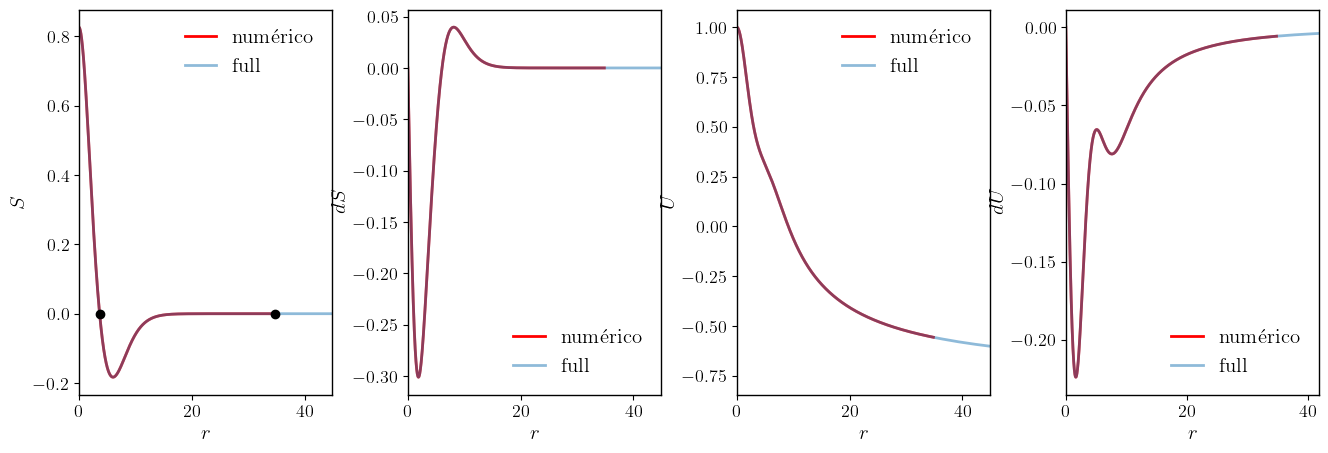

Checking normalización, 0.9999999995360317 1
Checking convergencia de la Energía U(inf), U(asint) -0.03075598117173043 -0.030796537272389755

Plot extensión normalizada y interpolación


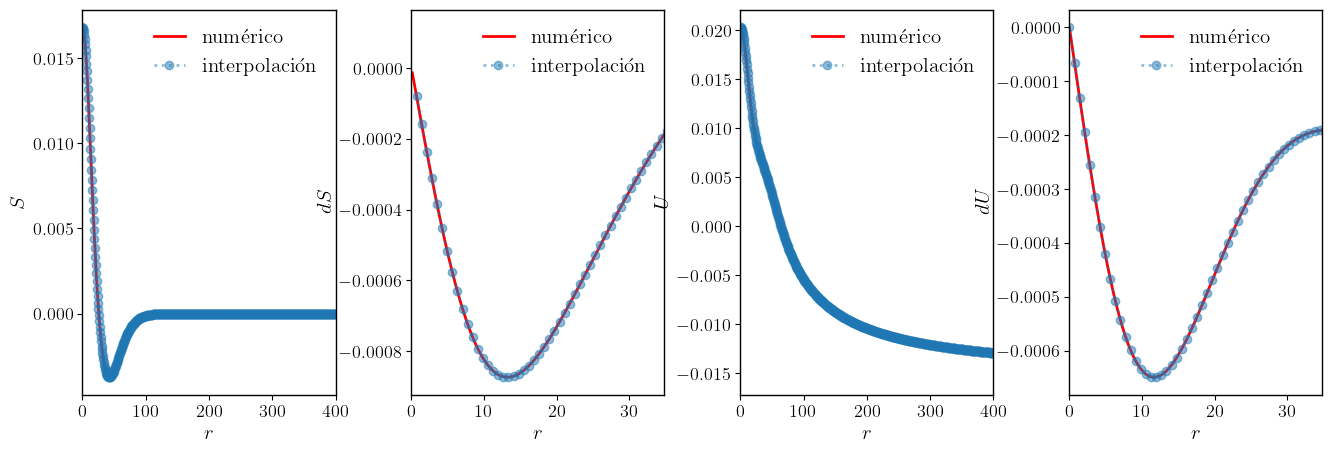

In [5]:
# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+Ext, 1000)

print('')
print('Plot shooting y extensión')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

plt.show()

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

# graficando
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 10000)

print('')
print('Plot extensión normalizada y interpolación')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ':o', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ':o', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [6]:
# salvando x, sigma, u, En
#enVec = [en]*len(xN)
#temp = np.array([xN, sN, uN, enVec]).T
#np.savetxt('BackgroundData_n_3_ell_1.dat', temp)

### Estudiando autovalores

In [7]:
# Estudiando convergencia de autovalores con rmax fijo 
# checking==True:
datFunc = [fsN, fuN]
rMax = 200*(nodos+1)
Nptos = int(3*rMax/4)

autDat = 10
# [int(Nptos/4), int(Nptos/3), int(Nptos/2), int(Nptos), int(Nptos*2), int(Nptos*3)]
NptosDat = np.arange(30, 300, 20)
Jval = range(0, 9)

datos = [[None]*len(Jval) for _ in range(len(NptosDat))]  # cada fila es un valor de Nptos y columna J
for J in Jval:
    k=0
    for i in NptosDat:
        util = [ell, J, i, rMax]
        lEnigF1, _, VF1, _ = ru.espectro(datFunc, util)

        # autovalores reales
        jj = np.real(lEnigF1)!=0
        autoval = lEnigF1[jj]
        #print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, i), autoval)

        # Organizando de menor a mayor los autovalores
        indF = ru.menor(lEnigF1).astype(int)
        AutovaOrg = lEnigF1[indF]
        datos[k][J] = AutovaOrg[:autDat]
        k += 1

In [8]:
# Estudiando convergencia de autovalores con Nptos fijo 
# checking==True:
datFunc = [fsN, fuN]
rMax = 200*(nodos+1)
Nptos = int(3*rMax/4)

autDat = 10
DatrMax = np.arange(40, 300, 20)
Jval = range(0, 9)

datos2 = [[None]*len(Jval) for _ in range(len(DatrMax))]  # cada fila es un valor de Nptos y columna J
for J in Jval:
    k=0
    for i in DatrMax:
        util = [ell, J, Nptos, i]
        lEnigF1, _, VF1, _ = ru.espectro(datFunc, util)

        # autovalores reales
        jj = np.real(lEnigF1)!=0
        autoval = lEnigF1[jj]
        #print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, i), autoval)

        # Organizando de menor a mayor los autovalores
        indF = ru.menor(lEnigF1).astype(int)
        AutovaOrg = lEnigF1[indF]
        datos2[k][J] = AutovaOrg[:autDat]
        k += 1

In [9]:
# calculando diferencia relativa con respecto a N=int(Nptos)
compN = 6  # valor de Nptos con el que se desea comparar
# [J1, J2, ..., Jval] -> J=[A1, A2, ..., autDat] -> A=[N1, N2, NptosDat]
# [[[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], 
#  [[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], ..., 
# Jval]
dat1 =  [[[None]*len(NptosDat) for __ in range(autDat)] for _ in range(len(Jval))]
for J in range(len(Jval)):  
    for i in range(autDat):
        for k in range(len(NptosDat)):
            if k==compN:
                continue
            temp = np.abs(np.abs(datos[k][J][i]) - np.abs(datos[compN][J][i]))/np.abs(datos[compN][J][i])
            dat1[J][i][k] = temp

In [10]:
# calculando diferencia relativa con respecto a rmax
compRmax = 8  # valor de Nptos con el que se desea comparar
# [J1, J2, ..., Jval] -> J=[A1, A2, ..., autDat] -> A=[N1, N2, NptosDat]
# [[[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], 
#  [[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], ..., 
# Jval]
dat2 =  [[[None]*len(DatrMax) for __ in range(autDat)] for _ in range(len(Jval))]
for J in range(len(Jval)):  
    for i in range(autDat):
        for k in range(len(DatrMax)):
            if k==compRmax:
                continue
            temp = np.abs(np.abs(datos[k][J][i]) - np.abs(datos[compRmax][J][i]))/np.abs(datos[compRmax][J][i])
            dat2[J][i][k] = temp

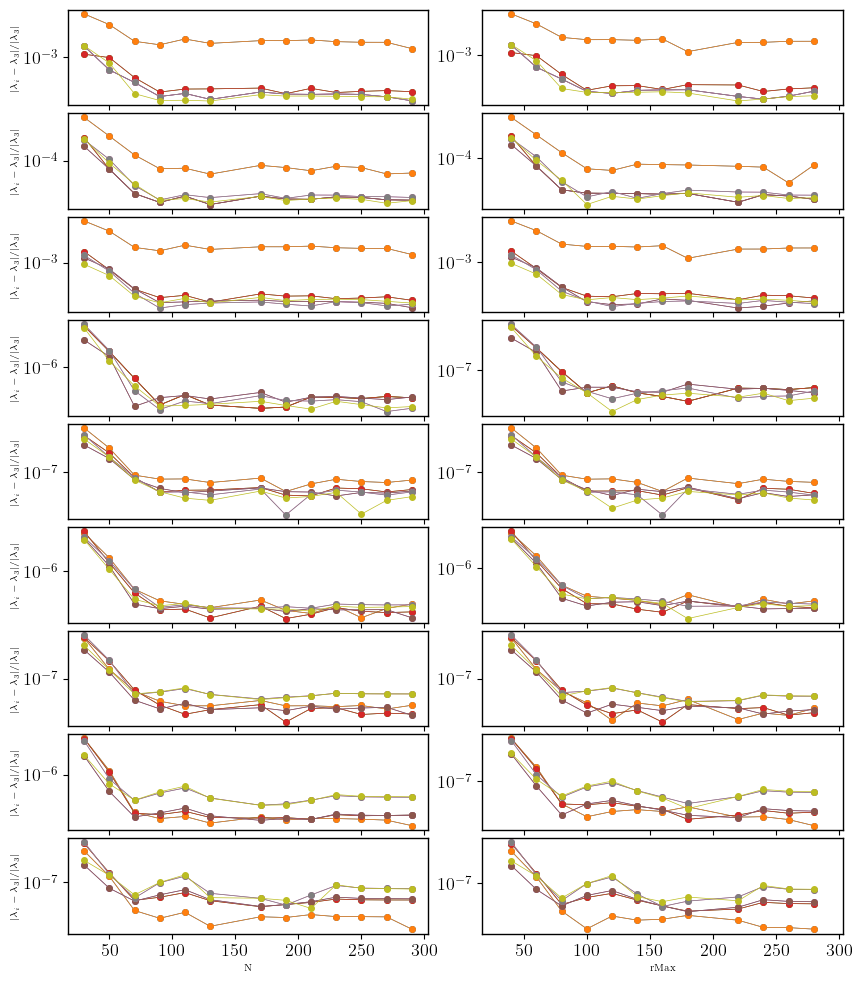

In [11]:
fig, ax = plt.subplots(nrows=len(Jval), ncols=2, figsize=(10, 12.),
                       sharex=True, sharey=False,
                       gridspec_kw=dict(hspace=0.08, wspace=.15))

for J in range(len(Jval)):
    for i in range(autDat-1):
        temp = np.array(dat1[J][i])
        ind = temp!=None
        ydat = temp[ind]
        xdat = NptosDat[ind]
        ax[J][0].plot(xdat, ydat, ls='-', lw=0.5, marker='o', markersize=4)
        ax[J][0].set_yscale('log')
        
        #ax[J][0].set_ylim(1e-14, 300)
        ax[J][0].set_ylabel(r'$|\lambda_{i}-\lambda_{3}|/|\lambda_{3}|$', fontsize=7)

        #ax[J][0].text(350, 1e-04, s=r'J=%d'%J)

    for i in range(autDat-1):
        temp = np.array(dat2[J][i])
        ind = temp!=None
        ydat = temp[ind]
        xdat = DatrMax[ind]
        ax[J][1].plot(xdat, ydat, ls='-', lw=0.5, marker='o', markersize=4)
        ax[J][1].set_yscale('log')
        
        #ax[J][0].set_ylim(1e-14, 300)
        #ax[J][1].set_ylabel(r'$|\lambda_{i}-\lambda_{3}|/|\lambda_{3}|$', fontsize=7)

        #ax[J][0].text(350, 1e-04, s=r'J=%d'%J)
    
    ax[-1][0].set_xlabel('N', fontsize=7)
    ax[-1][1].set_xlabel('rMax', fontsize=7)


In [12]:
### La convergencia es bueno para 
# rMax = 200*(nodos+1)
# Nptos = int(3*rMax/4)
# así que lo calculamos usando esas condiciones

In [7]:
# Calculando los autovalores (Espectro)
Jval = range(0, 6)  # momento angular de la perturbación 

rMax = 200*(nodos+1) 
Nptos = int(3*rMax/4) + 250

datFunc = [fsN, fuN]

# cada fila es un valor de Nptos y columna J
Auto_Valores, Auto_Funciones = [], []
for J in Jval:
    util = [ell, J, Nptos, rMax]
    lambd, _, Vecto_Full, _ = ru.espectro(datFunc, util)

    #### Separando los Autovalores ######
    jj = np.real(lambd)!=0  # reales
    autoval_Real = lambd[jj]
    print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, Nptos), autoval_Real)
    
    if len(autoval_Real)!=0:
        temp = len(autoval_Real)
        name = 'Nod_%d_data_l%d_J%d.dat'%(nodos,ell, J)
        data = np.array([[J]*temp, autoval_Real.real, autoval_Real.imag]).T
        np.savetxt(name, data)
    ###############

    ###### Organizando de menor a mayor los autovalores #####
    indF = ru.menor(lambd).astype(int)
    autova_Organ = lambd[indF]

    ###### Salvando  #####
    Auto_Valores.append(autova_Organ)
    Auto_Funciones.append(Vecto_Full[:, indF])

Autovalores con part. Real para J=0, Npt.=550 ->  [-0.00148347+0.00979587j -0.00148347-0.00979587j  0.00148347-0.00979587j
  0.00148347+0.00979587j]
Autovalores con part. Real para J=1, Npt.=550 ->  []
Autovalores con part. Real para J=2, Npt.=550 ->  [-0.00166661+3.87710697e-16j  0.00166661+3.87710697e-16j]
Autovalores con part. Real para J=3, Npt.=550 ->  []
Autovalores con part. Real para J=4, Npt.=550 ->  []
Autovalores con part. Real para J=5, Npt.=550 ->  []


In [8]:
autDat = 10  # numero de autovalores que se mostrarán
k = 0
for J in Jval:
    print('Autovalores para J -> %d'%J)
    print('') 
    print(Auto_Valores[k][:autDat])
    print('')
    k += 1

Autovalores para J -> 0

[-0.        -1.33494484e-06j  0.        +1.33494485e-06j
  0.        +3.00044770e-03j -0.        -3.00044770e-03j
 -0.        -8.12230183e-03j  0.        +8.12230183e-03j
 -0.00148347-9.79587464e-03j  0.00148347-9.79587464e-03j
 -0.00148347+9.79587464e-03j  0.00148347+9.79587464e-03j]

Autovalores para J -> 1

[ 0.+0.00017678j -0.-0.00017678j  0.+0.00296243j -0.-0.00296243j
  0.+0.00612729j -0.-0.00612729j -0.-0.00893262j  0.+0.00893262j
 -0.-0.01060022j  0.+0.01060022j]

Autovalores para J -> 2

[-0.00166661+3.87710697e-16j  0.00166661+3.87710697e-16j
 -0.        -5.52398431e-03j  0.        +5.52398431e-03j
 -0.        -8.45752372e-03j  0.        +8.45752372e-03j
  0.        +1.02686908e-02j -0.        -1.02686908e-02j
 -0.        -1.14611237e-02j  0.        +1.14611237e-02j]

Autovalores para J -> 3

[ 0.+0.00296557j -0.-0.00296557j  0.+0.00752423j -0.-0.00752423j
  0.+0.00975168j -0.-0.00975168j  0.+0.01113733j -0.-0.01113733j
  0.+0.01206728j -0.-0.01206728

In [39]:
J = 2
autoV = 2
utilez = [ell, Nptos, rMax]
c1, Lval, r_dis, datA, datB = ru.VectoresAB(J, autoV, Auto_Funciones, Auto_Valores, utilez)

1
(0.006193981355077658+0.03340185610524255j)


(0.0, 150.0)

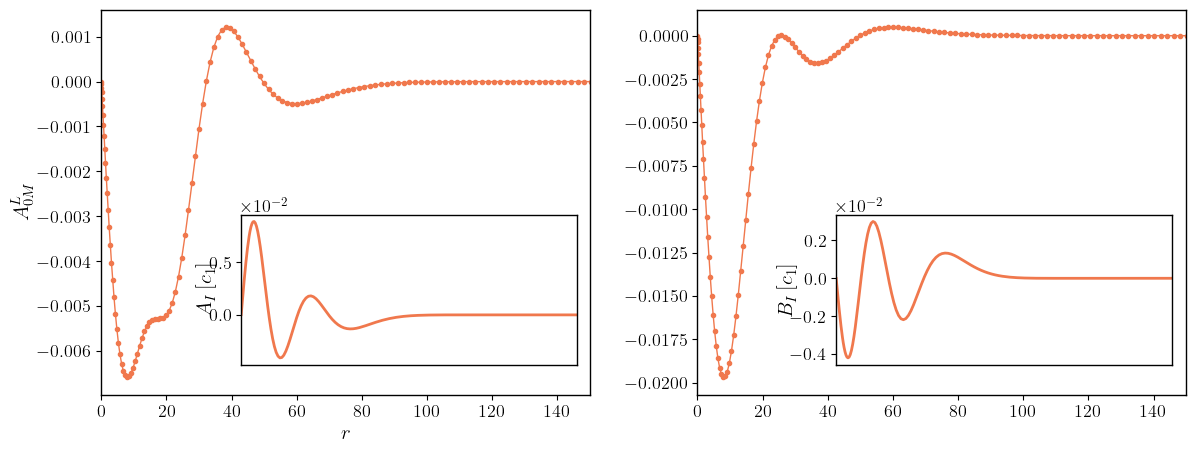

In [49]:
ellPos = 1
cte = fsN(r_dis[1:Nptos]).max()/np.abs(datB[ellPos]).max()

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=True,
                       gridspec_kw=dict(hspace=0.0, wspace=.15))

left, bottom, width, height = [0.225, 0.15, 0.2, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.69, 0.13, 0.2, 0.28]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(c1):
    ax[0].plot(r_dis[1:Nptos], np.real(datA[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax1.plot(r_dis[1:Nptos], np.imag(datA[i]*cte),  ls=Ls[i], lw=1, 
             c=col[3])

    ax[1].plot(r_dis[1:Nptos], np.real(datB[i]*cte), ls=Ls[i], lw=1, 
               label=r'$L = %d$'%(Lval[i]), c=col[3])
    ax2.plot(r_dis[1:Nptos], np.imag(datB[i]*cte), ls=Ls[i], lw=1, 
             c=col[3])

ax[1].plot(r_dis[1:Nptos][::2], fsN(r_dis[1:Nptos][::2]), ls='', marker='o', markersize=4, #mfc='white',
           color=col[3], label=r'$\sigma_{%d}^{(0)} \times c_1$'%ell)

ax[0].set_xlabel(r'$r \, [d_c]$')
ax[1].set_xlabel(r'$r \, [d_c]$')
ax[0].set_ylabel(r'Re $A_{%d M}^{L}\,[c_1]$'%J)
ax[1].set_ylabel(r'Re $B_{%d M}^{L} \,[c_1]$'%J, labelpad=8)
ax1.set_ylabel(r'Im $A_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)
ax2.set_ylabel(r'Im $B_{%d M}^{L} \,[c_1]$'%J, labelpad=-5)

ax[0].set_xlim(0, 50)
ax[1].set_xlim(0, 50)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 50)

ax[0].set_ylim(-0.1, 0.1)
ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)

ax[0].set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax1.set_yticks([-0.1, 0,  0.1])
ax2.set_yticks([-0.1, 0,  0.1])

ax1.set_xticks([])
ax2.set_xticks([])

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

ax[0].text(x=3, y= 0.08, s=r'$\ell=%d \quad n=%d \quad J=%d$'%(ell, nodos, J))
ax[0].text(x=2.8, y= 0.06, s=r'$\lambda=%9.8f \times 1/t_c$'%np.real(Auto_Valores[J][autoV]))